---

#  mplfinance: using lines for trends, support, resistance, and trading

---

### Sometimes it is convenient to draw straight lines ontop of an ohlc or candlestick chart, for example:
- Horizontal lines to mark levels of support and resistance
- Vertical lines to indicate the start or end of trading sessions, or to indicate the time or date when a trade took place.
- Trend lines to highlight a trend in the movement of prices.

#### `mpf.plot()` supports the drawing of straight lines on top of an ohlc or candlestick chart using one or more of the following four kwargs:

| keyword | argument value | action |
|:---|:---|:---|
| **`hlines`** | price, or sequence of prices | draw horizontal line(s) at a specified price level(s). |
| **`vlines`** | date[time], or sequence of date[time] | draw vertical line(s) at a specified date(s) or time(s). |
| **`alines`** | a sequence of two or more date/price pairs, or<br> a sequence of sequences of two or more date/price pairs | draw an arbitrary line by specifying two or more x,y pairs,<br>for example: (dateA,priceA),(dateB,priceB) to draw a line from point (dateA,priceA) to point (dateB,priceB).<br>this may be done for various reasons, including highlighting trends. |
| **`tlines`** | a list of one or more pairs of date[time]s | - calculate and draw a trend line between each date[time] in each date[time] pair<br>- value used at each date[time] may be open ,close, high, low,<br>&nbsp;&nbsp;&nbsp;or the average of any combination thereof<br>- trend line calculation method may be:<br>&nbsp;&nbsp;&nbsp;&nbsp;- a simple 'point-to-point' (from value at one date[time] to value at the other date[time]), or<br>  &nbsp;&nbsp;&nbsp;&nbsp;- linear 'least-squares' fit of all values from one date[time] through and including the other date[time]. |

---
In every case, the kwarg argument value may be either as specified in the above table<br>**OR the argument may be a dict** containing the above mentioned keyword and argument as specified above,<br> **plus** any or all of the following keywords to modify the line(s) being drawn:

- `colors`
- `linestyle`
- `linewidths`
- `alpha`

For example, both of the following are valid specifications for `hlines`:
- `hlines=(123.0,128.0)`
- `hlines=dict( hlines=(123.0,128.0),colors=['r','g','b'],linestyle='dotted',linewidths=(3,4) )`

---

### See below for specific example usage of each of the kwargs:<br>&nbsp;&nbsp;`hlines`, `vlines`, `alines`, and `tlines`

In [1]:
# This allows multiple outputs from a single jupyter notebook cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
%matplotlib inline
import pandas as pd

### Read in daily data for the S&P 500 from November of 2019 

In [3]:
daily = pd.read_csv('data/SP500_NOV2019_Hist.csv',index_col=0,parse_dates=True)
daily.index.name = 'Date'
daily.shape
daily.head(2)
daily.tail(2)

(20, 5)

,Open,High,Low,Close,Volume
Date,,,,,
2019-11-01,3050.72,3066.95,3050.72,3066.91,510301237
2019-11-04,3078.96,3085.20,3074.87,3078.27,524848878


,Open,High,Low,Close,Volume
Date,,,,,
2019-11-27,3145.49,3154.26,3143.41,3153.63,421853938
2019-11-29,3147.18,3150.30,3139.34,3140.98,286602291


In [4]:
import mplfinance as mpf
mpf.__version__

'0.12.9b0'

---
## hlines (horizontal lines)

**We can plot horizontal lines to show support and resistance:**

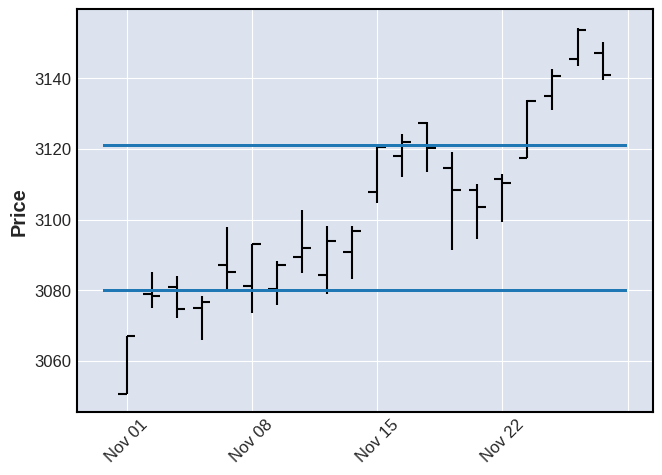

In [5]:
mpf.plot(daily,hlines=[3080,3121])

---

**We can color the lines, and modify the line style:**

(works with candlesticks too)

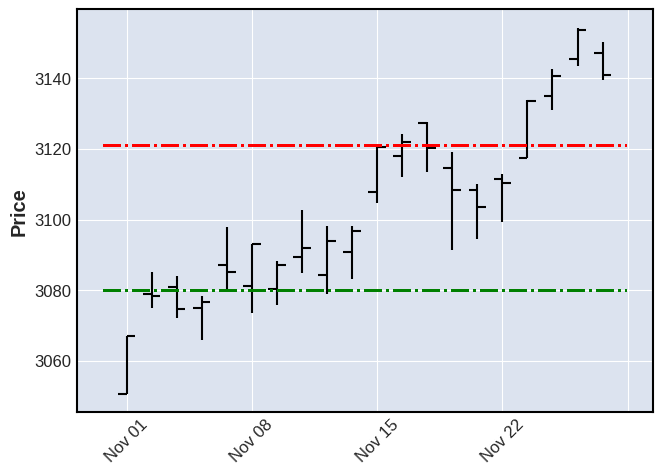

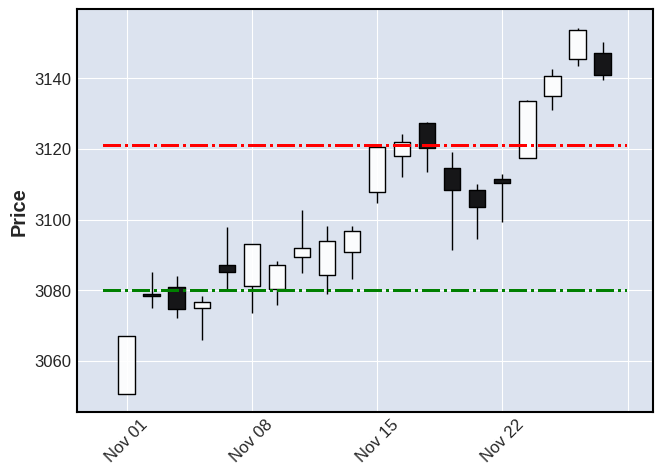

In [6]:
mpf.plot(daily,hlines=dict(hlines=[3080,3121],colors=['g','r'],linestyle='-.'))
mpf.plot(daily,hlines=dict(hlines=[3080,3121],colors=['g','r'],linestyle='-.'),type='candle')

---

## vlines (vertical lines)

---

**We can use vertical lines to indicate days on which we made a trade:**

In [7]:
STOP HERE

SyntaxError: invalid syntax (3031286301.py, line 1)

In [22]:
daily.index

DatetimeIndex(['2019-11-01', '2019-11-04', '2019-11-05', '2019-11-06',
               '2019-11-07', '2019-11-08', '2019-11-11', '2019-11-12',
               '2019-11-13', '2019-11-14', '2019-11-15', '2019-11-18',
               '2019-11-19', '2019-11-20', '2019-11-21', '2019-11-22',
               '2019-11-25', '2019-11-26', '2019-11-27', '2019-11-29'],
              dtype='datetime64[ns]', name='Date', freq=None)

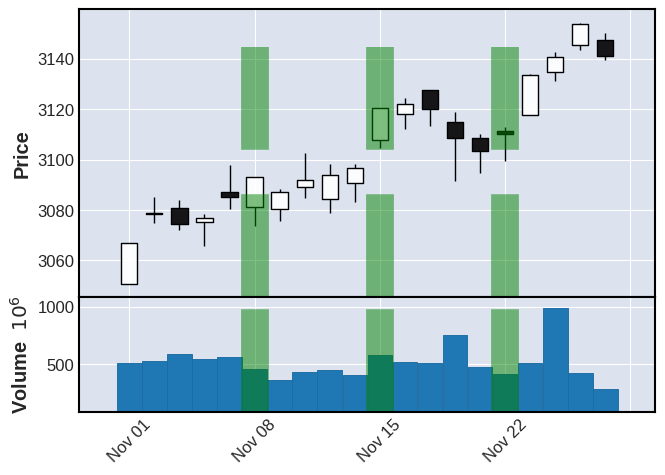

In [24]:
fig, axlist = mpf.plot(daily,type='candle',
         #vlines=dict(vlines=['2019-11-06','2019-11-15','2019-11-25'],colors='g'),
         #vlines_all=True,
         returnfig=True,
         volume=True)

for ax in axlist:
    for v in (5,10,15):
        ax.axvline(x=v,color='g',linestyle='--',linewidth=20,alpha=0.5)

---

**we can also use a thick, but transparent (alpha=0.4), line to shade a portion of the plot:**

In [ ]:
mpf.plot(daily,type='candle',vlines=dict(vlines='2019-11-18',linewidths=125,alpha=0.4))

---

**Another use for vertical lines is to show the start of each trading day for intraday data:**

In [ ]:
idf = pd.read_csv('./data/SP500_NOV2019_IDay.csv',index_col=0,parse_dates=True)
idf.shape
idf.head(2)
idf.tail(2)

In [ ]:
vls=['2019-11-05 09:30',
     '2019-11-06 09:30',
     '2019-11-07 09:30',
     '2019-11-08 09:30']
mpf.plot(idf,vlines=dict(vlines=vls,colors=('r','g','b','c')))  # different color for each line
mpf.plot(idf,vlines=dict(vlines=vls,colors='c'))                # one color for all lines

---

---

## alines (arbitrary lines)


**We can use a sequence of "points" to draw arbitrary lines,<br>where a "point" is a (date,price) pair:**

In [ ]:
df = pd.read_csv('./data/yahoofinance-SPY-20080101-20180101.csv',index_col=0,parse_dates=True)
df = df.loc['2016-05-01':'2016-06-16',:]
df.shape
df.head(2)
df.tail(2)

In [ ]:
mpf.plot(df)

---

**We can draw an arbitrary line by specifying sequence of two or more points:**

In [ ]:
two_points  = [('2016-05-19',203.5),('2016-05-25',209.5)]

more_points = [('2016-05-02',207),('2016-05-06',204),('2016-05-10',208.5),('2016-05-19',203.5),
               ('2016-05-25',209.5), ('2016-06-08',212),('2016-06-16',207.5)]

mpf.plot(df,alines=two_points )
mpf.plot(df,alines=more_points)

---

---

**An "arbitrary line" (`alines`) may be a sequence of points, or a sequence of sequences of points.<br><br>The difference is whether it is treated as one (possibly discontinuous) line,<br> or as multiple lines (each of which may be discontinuous).<br><br>If we specify a _sequence of sequences_ of points, then each _subsequence_ is treated as a separate line.<br><br>Below we see the exact same points as a<br>&nbsp;&nbsp;&nbsp;1. sequence of points<br>&nbsp;&nbsp;&nbsp;2. sequence of sequences<br>&nbsp;&nbsp;&nbsp;3. sequence of sequences, where the end point of each subsequence is repeated as the beginning point of the next subsequence.**

In [ ]:
seq_of_points=[('2016-05-02',207),('2016-05-06',204),
               ('2016-05-10',208.5),('2016-05-19',203.5),('2016-05-25',209.5),
               ('2016-06-08',212),('2016-06-16',207.5)]

seq_of_seq_of_points=[
    [('2016-05-02',207),('2016-05-06',204)],
    [('2016-05-10',208.5),('2016-05-19',203.5),('2016-05-25',209.5)],
    [('2016-06-08',212),('2016-06-16',207.5)]
                     ]

seq_of_seq_repeat_point_in_between=[
    [('2016-05-02',207),('2016-05-06',204)],
    [('2016-05-06',204),('2016-05-10',208.5),('2016-05-19',203.5),('2016-05-25',209.5)],
    [('2016-05-25',209.5),('2016-06-08',212),('2016-06-16',207.5)]
                     ]

mpf.plot(df,alines=dict(alines=seq_of_points                     ,colors=['b','r','c','k','g']))
mpf.plot(df,alines=dict(alines=seq_of_seq_of_points              ,colors=['b','r','c','k','g']))
mpf.plot(df,alines=dict(alines=seq_of_seq_repeat_point_in_between,colors=['b','r','c','k','g']))

---
**As we saw above, any lines (`hlines`,`vlines`,`alines`,`tlines`) may be made thicker and/or transparent:**

In [ ]:
mpf.plot(df,
         type='candle',
         alines=dict(alines=seq_of_seq_repeat_point_in_between,
                     colors=['b','r','c'],
                     linewidths=40,
                     alpha=0.35),
         figscale=1.25
        )

---

## tlines (trend lines)

---

---

### Use `tlines` to specify _only_ 'dates' or 'times' and mplfinance will<br> determine and draw a "trend line" between those two dates (or times).**

---

**When `tlines` is a dict, you may also specify:**


- **`tline_use` to indicate whether to use the 'open','high','low', or 'close', _or an average of any combination of ohlc_ for determining the trend line.**


- **`tline_method` to indicate whether to simply draw the trend line from point-to-point (the default method) or to use a "linear least squares fit" to determine the trend line.**


---


**As an example, using the same _dates_ from the above arbitrary lines example, we can ask mplfinance to display trend lines:**

In [ ]:
# grab the dates from the sequence of date,price points:
dates = [d for d,p in seq_of_points]
dates

In [ ]:
# now generate a sequence of date pairs:
datepairs = [(d1,d2) for d1,d2 in zip(dates,dates[1:])]
datepairs

In [ ]:
mpf.plot(df,tlines=datepairs)

---


**Using the same _date pairs_ as above, we can display trend lines using the 'high', the 'low', or the average of the 'open' and 'close':**

In [ ]:
mpf.plot(df,tlines=dict(tlines=datepairs,tline_use='high'))
mpf.plot(df,tlines=dict(tlines=datepairs,tline_use='low'))
mpf.plot(df,tlines=dict(tlines=datepairs,tline_use=['open','close']))

---

**We can combine `tlines` `dict`s into a `list`, to display different trend lines on the same plot:**

In [ ]:
mpf.plot(df,tlines=[dict(tlines=datepairs,tline_use='high',colors='g'),
                    dict(tlines=datepairs,tline_use='low',colors='b'),
                    dict(tlines=datepairs,tline_use=['open','close'],colors='r')],
         figscale=1.35
        )

---

**Now compare using point-to-point versus least-squares:**

In [ ]:
mpf.plot(df,tlines=[dict(tlines=datepairs,colors='b',tline_method='point-to-point'),
                    dict(tlines=datepairs,colors='r',tline_method='least-squares')
                   ],
         figscale=1.33
        )

---

**Try using least-squares for the entire data set, taking the average of ohlc, and alternatively the low, for the values to be used in the least squares regression:**

In [ ]:
d1 = df.index[ 0]
d2 = df.index[-1]
tdates = [(d1,d2)]
mpf.plot(df,tlines=
         [dict(tlines=tdates,tline_use=['open','close','high','low'],tline_method='least-squares',colors='r'),
          dict(tlines=tdates,tline_use=['low'],tline_method='least-squares',colors='b'),
          dict(tlines=tdates,tline_use=['low'],tline_method='point-to-point',colors='g')
         ],
         figscale=1.33
        )